# Milestones 1

---

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

Dataset yang digunakan dalam project ini adalah dataset penjualan sebuah supermarket dari January 2019 sampai Maret 2019. Dataset ini berisi 1000 baris dengan 13 kolom yang diantaranya adalah Invoice id, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax, Total, Date, Payment, COGS, Gross margin percentage, Gross income, dan Rating. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/aungpyaeap/supermarket-sales)

Keterangan pada kolom pada dataset ini adalah:

| Feature                 | Description                                                                                                                                                    |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Invoice id              | Computer generated sales slip invoice identification number                                                                                                    |
| Branch                  | Branch of supercenter (3 branches are available identified by A, B and C)                                                                                      |
| City                    | Location of supercenters                                                                                                                                       |
| Customer type           | Type of customers, recorded by Members for customers using member card and Normal for without member card                                                      |
| Gender                  | Gender type of customer                                                                                                                                        |
| Product line            | General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel |
| Unit price              | Price of each product in $                                                                                                                                     |
| Quantity                | Number of products purchased by customer                                                                                                                       |
| Tax                     | 5% tax fee for customer buying                                                                                                                                 |
| Total                   | Total price including tax                                                                                                                                      |
| Date                    | Date of purchase (Record available from January 2019 to March 2019)                                                                                            |
| Time                    | Purchase time (10am to 9pm)                                                                                                                                    |
| Payment                 | Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)                                                                |
| COGS                    | Cost of goods sold                                                                                                                                             |
| Gross margin percentage | Gross margin percentage                                                                                                                                        |
| Gross income            | Gross income                                                                                                                                                   |
| Rating                  | Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)        

### Objectives

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 0 sebagai berikut:

- Mampu melakukan hypothesis testing terhadap dataset yang diberikan.
- Mampu membuat dashboard interaktif terhadap dataset yang diberikan.
- Mampu mempresentasikan hasil visualisasi data dan temuan.

## Import Library

Mengimport semua library yang akan digunakan, dalam project ini menggunakan **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, dan **SciPy**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from scipy import stats

## Data Loading

Membuat dataframe dari file `supermarket_sales-Sheet1.csv`.

In [2]:
sales = pd.read_csv('dataset/supermarket_sales-Sheet1.csv')

Menampilkan 5 baris teratas dari dataframe.

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Data Characteristics

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Dataset ini terdiri dari:
- 7 kolom dengan tipe data **float**
- 1 kolom dengan tipe data **integer**
- 9 kolom dengan tipe data **object**

Kolom `Date` dan `Time` nantinya akan digabungkan kedalam kolom baru bernama `datetime` yang bertipe **datetime**.

Dari sini juga dapat diketahui bahwa **tidak ada missing value** pada dataset.

In [5]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


Dapat diketahui beberapa kolom memiliki **distribusi normal** (symmetric distribution). Sebagai contoh kolom `Rating` memiliki distribusi normal karena mean pada kolom tersebut hampir sama.

## Data Preprocessing

### Column Rename

Pada bagian ini akan dilakukan perubahan nama kolom dataframe untuk memudahkan pemanggilan kolom.

In [6]:
old_names = list(sales.columns)
new_names = ['ID', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'price', 'quantity', 'tax', 'total', 'date', 'time', 'payment', 'cogs', 'margin_percentage', 'gross_income', 'rating']

Melakukan perubahan nama kolom dataframe.

In [7]:
sales = sales.rename(columns=dict(zip(old_names, new_names)))

Bentuk dataframe setelah dilakukan perubahan nama kolom.

In [8]:
sales.head()

,ID,branch,city,customer_type,gender,product_line,price,quantity,tax,total,date,time,payment,cogs,margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Add Column

Pada bagian ini akan membuat kolom baru yang bernama `datetime` yang menggabungkan kolom `date` dan `time`.

In [9]:
sales['datetime'] = sales.date + " " + sales.time

Bentuk dataframe setelah dilakukan penambahan kolom baru.

In [10]:
sales.head()

,ID,branch,city,customer_type,gender,product_line,price,quantity,tax,total,date,time,payment,cogs,margin_percentage,gross_income,rating,datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1/5/2019 13:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3/8/2019 10:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3/3/2019 13:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1/27/2019 20:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2/8/2019 10:37


### Column Drop

Pada bagian ini akan dilakukan penghapusan kolom `date` dan `time` karena sudah dibuat kolom baru bernama `datetime`.

In [11]:
sales = sales.drop(columns=['date', 'time'])

Bentuk dataframe setelah dilakukan penghapusan kolom.

In [12]:
sales.head()

,ID,branch,city,customer_type,gender,product_line,price,quantity,tax,total,payment,cogs,margin_percentage,gross_income,rating,datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,1/5/2019 13:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,3/8/2019 10:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3/3/2019 13:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,1/27/2019 20:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2/8/2019 10:37


In [13]:
sales.shape

(1000, 16)

Setelah dilakukan penambahan dan penghapusan kolom sekarang dataframe memiliki **16** kolom.

### Convert Data Type

Pada bagian ini akan melakukan perubahan perubahan bentuk data dari kolom `datetime` menjadi **datetime**.

In [14]:
sales['datetime'] = pd.to_datetime(sales.datetime)

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 1000 non-null   object        
 1   branch             1000 non-null   object        
 2   city               1000 non-null   object        
 3   customer_type      1000 non-null   object        
 4   gender             1000 non-null   object        
 5   product_line       1000 non-null   object        
 6   price              1000 non-null   float64       
 7   quantity           1000 non-null   int64         
 8   tax                1000 non-null   float64       
 9   total              1000 non-null   float64       
 10  payment            1000 non-null   object        
 11  cogs               1000 non-null   float64       
 12  margin_percentage  1000 non-null   float64       
 13  gross_income       1000 non-null   float64       
 14  rating   

Dari info diatas dapat dilihat kolom `datetime` sekarang sudah berbentuk **datetime64[ns]**.

## Data Exploration

In [19]:
grouped_datetime = sales.groupby([sales.datetime.dt.date, 'branch']).gross_income.sum().reset_index()

In [25]:
px.plot(grouped_datetime, x='datetime', y='gross_income', kind='line', color='branch', title='Gross Income by Date and Branch')

Text(0.5, 1.0, 'Gross Income by Branch')

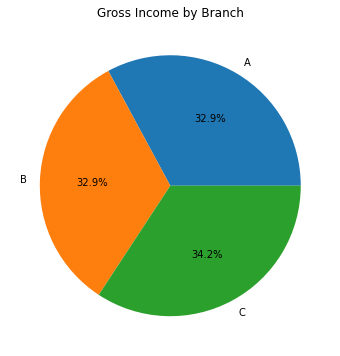

In [30]:
plt.figure(figsize=(12, 6))
plt.pie(grouped_datetime.groupby('branch').gross_income.sum(), labels=grouped_datetime.groupby('branch').gross_income.sum().index, autopct='%1.1f%%')
plt.title('Gross Income by Branch')